# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

(180, 2) (180,)


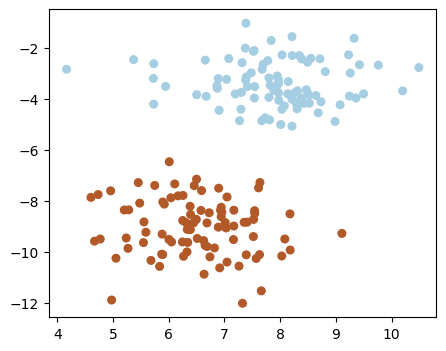

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples = 180 , centers = 2 , random_state = 6)
print(X.shape, y.shape)
_, ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c = y , s=30, cmap="Paired")

In [ ]:
clf = svm.SVC(kernel = 'linear', random_state=2)
clf.fit(X,y)
#clf = svm.SVC(kernel='linear', C=100)
#clf.fit(X, y)
#https://github.com/DavidReveloLuna/Machine-Learning/blob/master/3_5_M%C3%A1quinas_de_Soporte_Vectorial_SVM.ipynb

SVC(kernel='linear', random_state=2)

In [ ]:
#Crear funcion para graficar estoh_min
offset = 0.5
h_min, h_max = X[:,0].min()-offset, X[:, 0].max()+offset
v_min, v_max = X[:,1].min()-offset, X[:, 1].max()+offset

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 1000), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.decision_function(np.c_[h_grid.ravel(),v_grid.ravel()])
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape)
print (pred_grid.shape,h_grid.shape,v_grid.shape)

(100000,)
(100, 1000) (100, 1000) (100, 1000)


[]

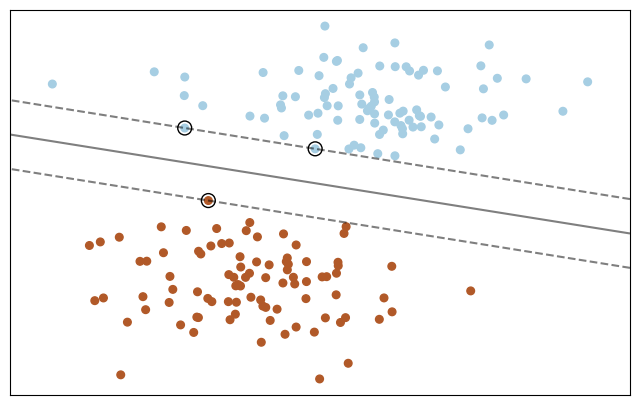

In [ ]:
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( X[:,0] , X[:,1] , c = y  , s = 30, cmap = "Paired")

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

#ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
#ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

## In real data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [ ]:
# import some data to play with
iris = load_iris()
X = iris.data[:,1:3]   # Pick 2 features
Y = iris.target
features_names = iris.features_names
print(X.shape, Y.shape, features_names)
_,ax = plt.subplots(figsize=(5,6))

In [ ]:
# Create an instance of SVM and fit the data.
clf = SVC ( kernel="linear", random_state=2)
clf.fit( X , Y )

SVC(kernel='linear', random_state=2)

In [ ]:
# Plot decision boundaries
h_min, h_max = X[:,0].min()-offset, X[:, 0].max()+offset
v_min, v_max = X[:,1].min()-offset, X[:, 1].max()+offset

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.predict(np.c_[h_grid.ravel(),v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)
print (pred_grid.shape,h_grid.shape,v_grid.shape)

(100, 100) (100, 100) (100, 100)


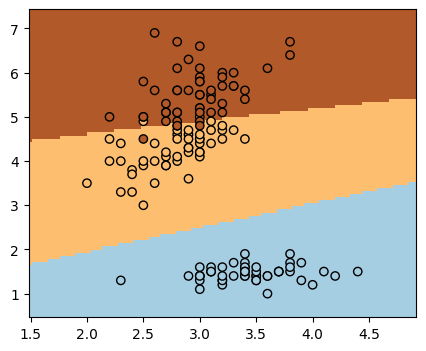

In [ ]:
#sp=clf
_, ax = plt.subplots(figsize=(5,4))
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap="Paired")
ax.scatter(X[:,0], X[:,1], c=Y, edgecolors="k", cmap="Paired")
#ax.scatter(sp[:,0], sp[:,1], facecolors="none", edgecolors="k", s=100)